# Create some of the plots used in the course

#### Sources: 
* https://ftp.ncbi.nlm.nih.gov/genbank/gbrel.txt
* https://ourworldindata.org/grapher/transistors-per-microprocessor

### Import modules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import datetime

/tmp/ipykernel_17808/4104410674.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Growth of GenBank

In [2]:
!cat ../data/genbank_growth.txt | head

# Release      Date     Base Pairs   Entries
    3    Dec 1982         680338       606
   14    Nov 1983        2274029      2427
   20    May 1984        3002088      3665
   24    Sep 1984        3323270      4135
   25    Oct 1984        3368765      4175
   26    Nov 1984        3689752      4393
   32    May 1985        4211931      4954
   36    Sep 1985        5204420      5700
   40    Feb 1986        5925429      6642


In [3]:
df = pd.DataFrame(
    [line.split()[:5] for line in open('../data/genbank_growth.txt', 'r') if not line.startswith('#')], 
    columns=['Release', 'Date1', 'Date2', 'Base_Pairs', 'Entries']
)

df['Date'] = df.apply(lambda x: f'{x["Date1"]} {x["Date2"]}', axis=1)
df['Date'] = df['Date'].map(lambda x: datetime.datetime.strptime(x, '%b %Y').date())
                      
del df['Date1']
del df['Date2']
                      
df['Base_Pairs'] = df['Base_Pairs'].astype('int64')
df['Entries'] = df['Entries'].astype('int64')

In [4]:
df.head(3)

,Release,Base_Pairs,Entries,Date
0,3,680338,606,1982-12-01
1,14,2274029,2427,1983-11-01
2,20,3002088,3665,1984-05-01


In [5]:
def genbank_growth(df, by='Entries', output_file=None):
    """Growth of genbank"""
    
    with plt.xkcd():
        fig = plt.figure(figsize=(8, 8))
        ax = plt.subplot2grid((1, 1), (0, 0))
        ax.plot(df['Date'], df[by], lw=3)

        ax.annotate(
            text=format(df.loc[0, by], ',d'),  
            xy=(df.loc[0, 'Date'], df.loc[0, by]), 
            arrowprops=dict(arrowstyle='-|>', color='red'), xytext=(df.loc[10, 'Date'], df.loc[100, by]),
            color='red'
        )
        last = list(df.index)[-1]
        ax.annotate(
            text=format(df.loc[last, by], ',d'), 
            xy=(df.loc[last, 'Date'], df.loc[last, by]), 
            arrowprops=dict(arrowstyle='-|>', color='red'), xytext=(df.loc[last - 80, 'Date'], df.loc[last - 10, by]),
            color='red'
        )
        
        ax.set_title('Growth of GenBank', fontsize=16)
        ax.set_xlabel('Years',  fontsize=12)
        if by == 'Entries':
            ax.set_ylabel('Number of sequences', fontsize=12)
        elif by == 'Base_Pairs':
            ax.set_ylabel('Number of base pairs', fontsize=12)
            
        if output_file:
            plt.savefig(output_file)

        plt.tight_layout()
        plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

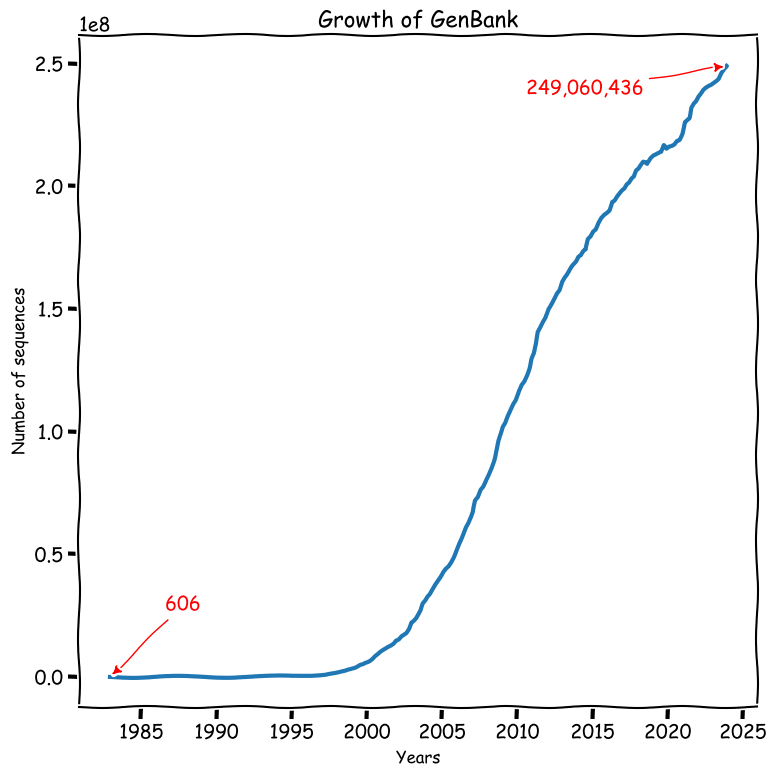

In [6]:
genbank_growth(df,output_file='../figures/genbank_growth.png')

In [7]:
!cat ../data/wgs_growth.txt | head

# Release      Date     Base Pairs     Entries
  129    Apr 2002      692266338      172768
  130    Jun 2002     3267608441      397502
  131    Aug 2002     3848375582      427771
  132    Oct 2002     3892435593      434224
  133    Dec 2002     6702372564      597042
  134    Feb 2003     6705740844      597345
  135    Apr 2003     6897080355      596818
  136    Jun 2003     6992663962      607155
  137    Aug 2003     7144761762      593801


In [8]:
wgs = pd.DataFrame(
    [line.split()[:5] for line in open('../data/wgs_growth.txt', 'r') if not line.startswith('#')], 
    columns=['Release', 'Date1', 'Date2', 'Base_Pairs', 'Entries']
)

wgs['Date'] = wgs.apply(lambda x: f'{x["Date1"]} {x["Date2"]}', axis=1)
wgs['Date'] = wgs['Date'].map(lambda x: datetime.datetime.strptime(x, '%b %Y').date())
                      
del wgs['Date1']
del wgs['Date2']
                      
wgs['Base_Pairs'] = wgs['Base_Pairs'].astype('int64')
wgs['Entries'] = wgs['Entries'].astype('int64')

In [9]:
wgs.head(3)

,Release,Base_Pairs,Entries,Date
0,129,692266338,172768,2002-04-01
1,130,3267608441,397502,2002-06-01
2,131,3848375582,427771,2002-08-01


In [10]:
def wgs_growth(wgs, by='Entries', output_file=None):
    """Growth of WGS data"""
    
    with plt.xkcd():
        fig = plt.figure(figsize=(8, 8))
        ax = plt.subplot2grid((1, 1), (0, 0))
        ax.plot(wgs['Date'], wgs[by], lw=3)

        ax.annotate(
            text=format(wgs.loc[0, by], ',d'),  
            xy=(wgs.loc[0, 'Date'], wgs.loc[0, by]), 
            arrowprops=dict(arrowstyle='-|>', color='red'), xytext=(wgs.loc[10, 'Date'], wgs.loc[90, by]),
            color='red'
        )
        last = list(wgs.index)[-1]
        ax.annotate(
            text=format(wgs.loc[last, by], ',d'),  
            xy=(wgs.loc[last, 'Date'], wgs.loc[last, by]), 
            arrowprops=dict(arrowstyle='-|>', color='red'), xytext=(wgs.loc[last - 50, 'Date'], wgs.loc[last - 3, by]),
            color='red'
        )
        
        ax.set_title('WGS base pairs', fontsize=16)
        ax.set_xlabel('Years',  fontsize=12)
        if by == 'Entries':
            ax.set_ylabel('Number of sequences',  fontsize=12)
        elif by == 'Base_Pairs':
            ax.set_ylabel('Number of base pairs',  fontsize=12)

        if output_file:
            plt.savefig(output_file)

        plt.tight_layout()    
        plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

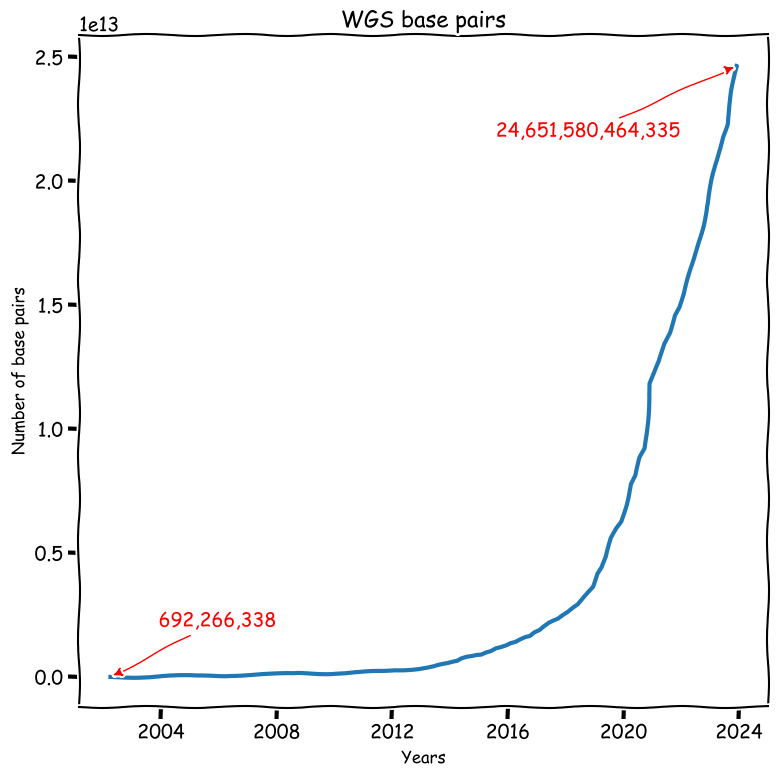

In [11]:
wgs_growth(wgs, by='Base_Pairs', output_file='../figures/wgs_growth.png')

In [12]:
!head ../data/transistors-per-microprocessor.csv 

Entity,Code,Year,Transistors per microprocessor
World,OWID_WRL,1971,2308.2417
World,OWID_WRL,1972,3554.5222
World,OWID_WRL,1974,6097.5625
World,OWID_WRL,1979,29163.777
World,OWID_WRL,1982,135772.72
World,OWID_WRL,1985,273841.94
World,OWID_WRL,1986,273841.94
World,OWID_WRL,1988,273841.94
World,OWID_WRL,1989,1207900.8


In [13]:
tr = pd.read_csv('../data/transistors-per-microprocessor.csv', sep=',', header=0)

In [14]:
tr.head(3)

,Entity,Code,Year,Transistors per microprocessor
0,World,OWID_WRL,1971,2308.2417
1,World,OWID_WRL,1972,3554.5222
2,World,OWID_WRL,1974,6097.5625


In [15]:
def transistors_growth(tr, by='Transistors per microprocessor', output_file=None):
    """Rate if growth of genebank"""
    
    with plt.xkcd():
        fig = plt.figure(figsize=(8, 8))
        ax = plt.subplot2grid((1, 1), (0, 0))
        ax.plot(tr['Year'], np.log(tr[by]), lw=3)
        ax.scatter(tr['Year'], np.log(tr[by]), color='red')
        
        ax.set_title('CPU Transistor Counts', fontsize=16)
        ax.set_ylabel('Transistor count',  fontsize=12)
        ax.set_xlabel('Date of introduction',  fontsize=12)

        if output_file:
            plt.savefig(output_file)

        plt.tight_layout()    
        plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

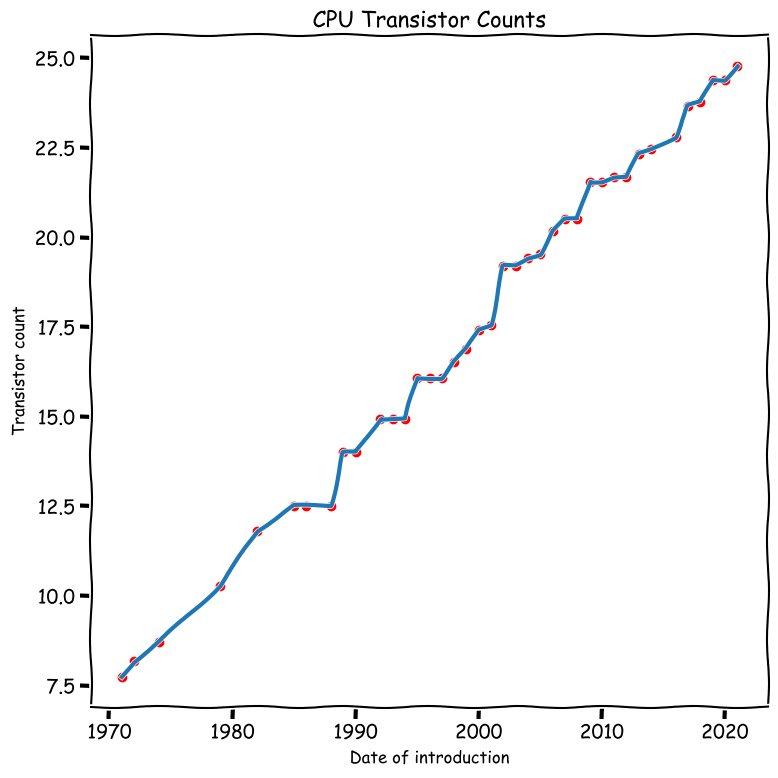

In [16]:
transistors_growth(tr, output_file='../figures/cpu_transistor_counts.png')

### END